In [1]:
from pathlib import Path

FIG_DIR = Path("outputs/report_figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)
print("Saving figures to:", FIG_DIR.resolve())


Saving figures to: D:\house-price-map-model\outputs\report_figures


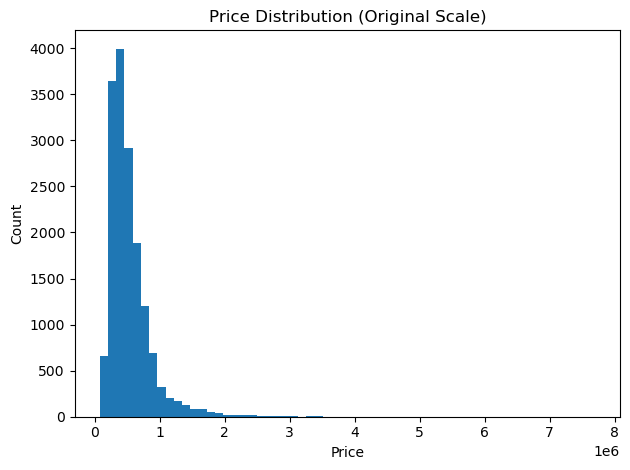

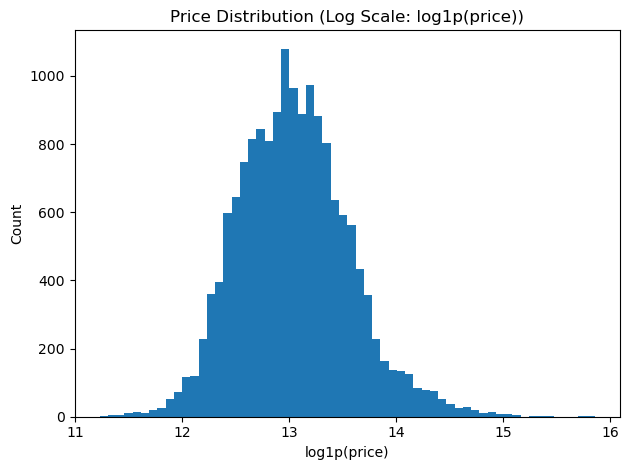

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

TRAIN_PATH = Path("data/raw/train(1).xlsx")
df = pd.read_excel(TRAIN_PATH)

price = df["price"].dropna().values
log_price = np.log1p(price)

# --- Figure 1A: original price histogram ---
plt.figure()
plt.hist(price, bins=60)
plt.title("Price Distribution (Original Scale)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("outputs/report_figures/fig1_price_hist.png", dpi=200)
plt.show()

# --- Figure 1B: log price histogram ---
plt.figure()
plt.hist(log_price, bins=60)
plt.title("Price Distribution (Log Scale: log1p(price))")
plt.xlabel("log1p(price)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("outputs/report_figures/fig2_log_price_hist.png", dpi=200)
plt.show()


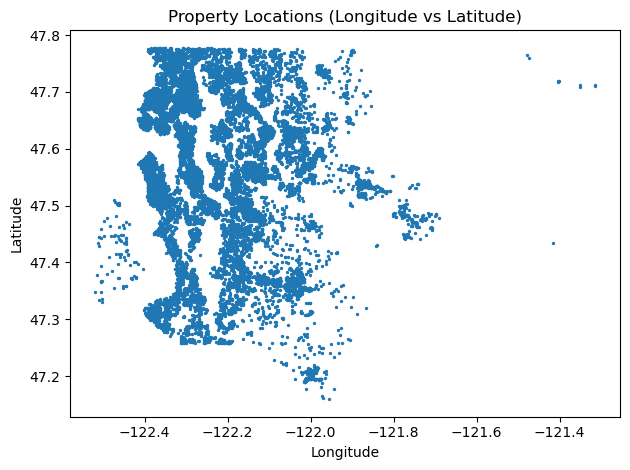

In [3]:
import matplotlib.pyplot as plt

assert "lat" in df.columns and "long" in df.columns, "Expected lat and long columns"

plt.figure()
plt.scatter(df["long"], df["lat"], s=2)  # small dots
plt.title("Property Locations (Longitude vs Latitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.savefig("outputs/report_figures/fig3_geo_scatter.png", dpi=200)
plt.show()


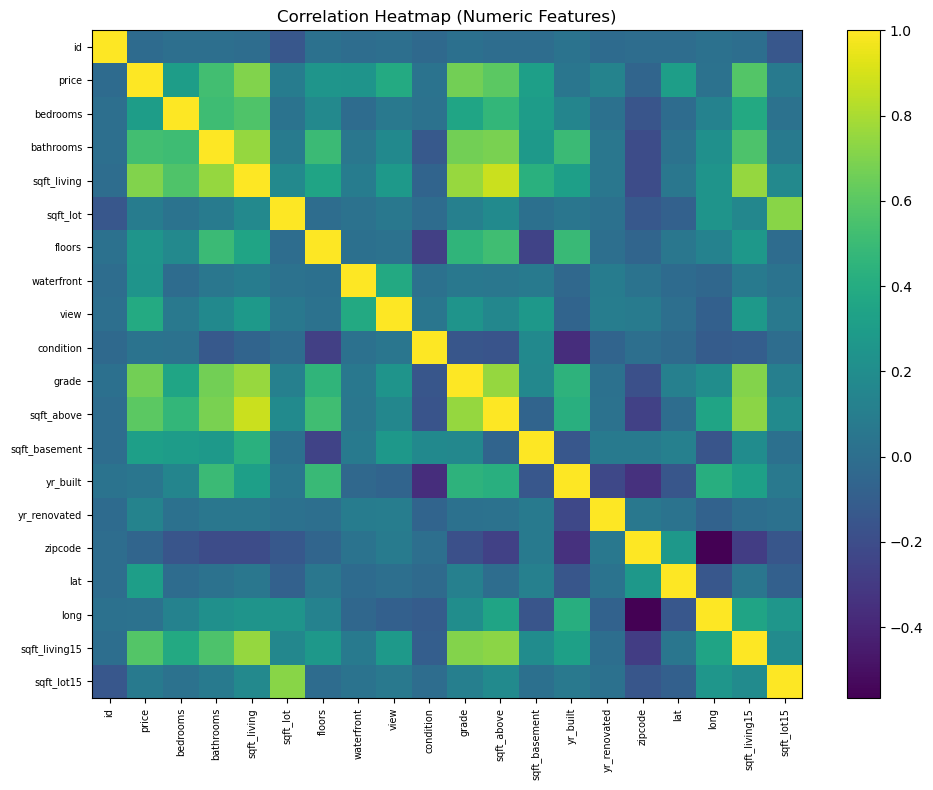

In [4]:
import numpy as np
import matplotlib.pyplot as plt

num_df = df.select_dtypes(include=[np.number]).copy()

corr = num_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
plt.imshow(corr.values, aspect="auto")
plt.title("Correlation Heatmap (Numeric Features)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=7)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=7)
plt.colorbar()
plt.tight_layout()
plt.savefig("outputs/report_figures/fig4_corr_heatmap.png", dpi=200)
plt.show()


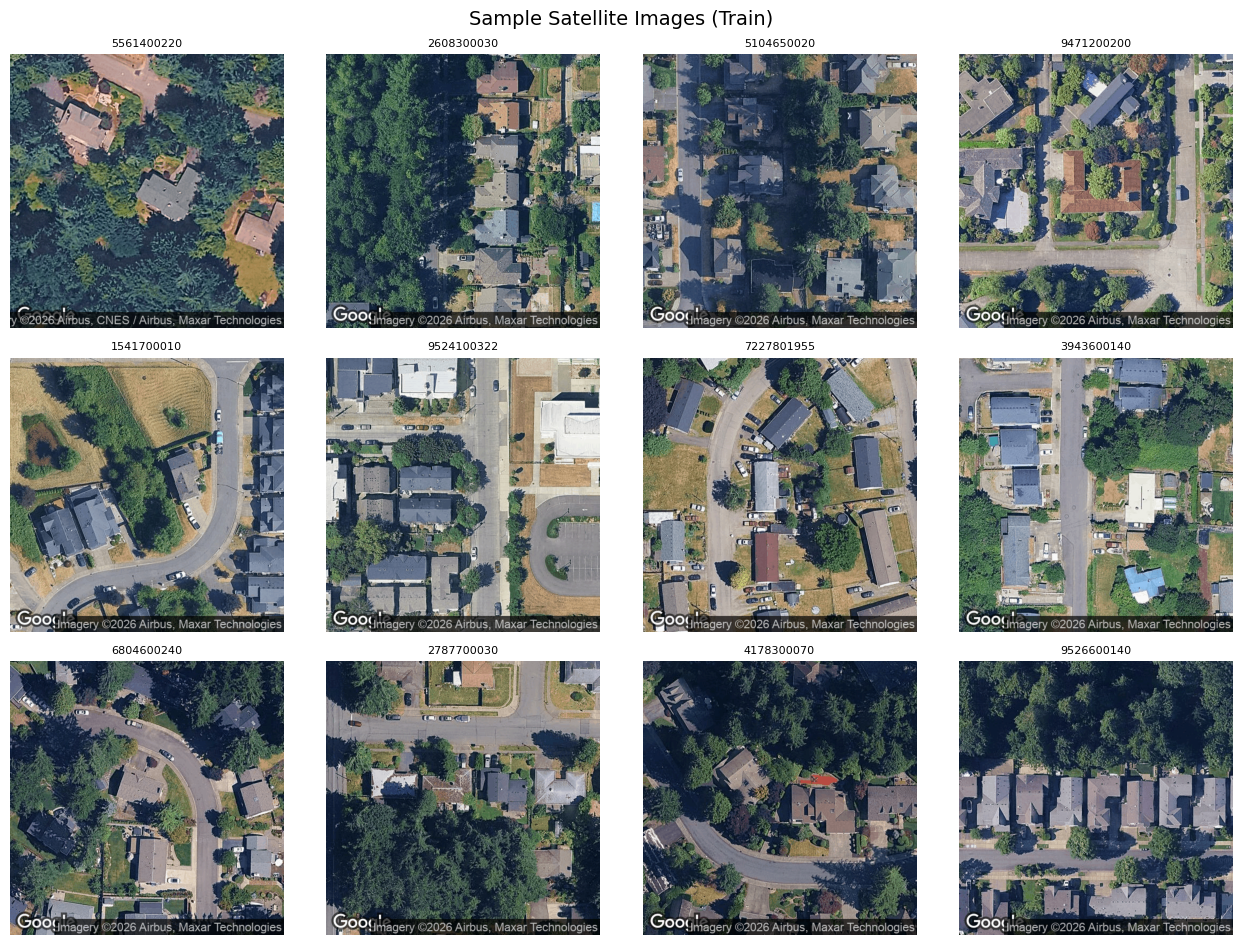

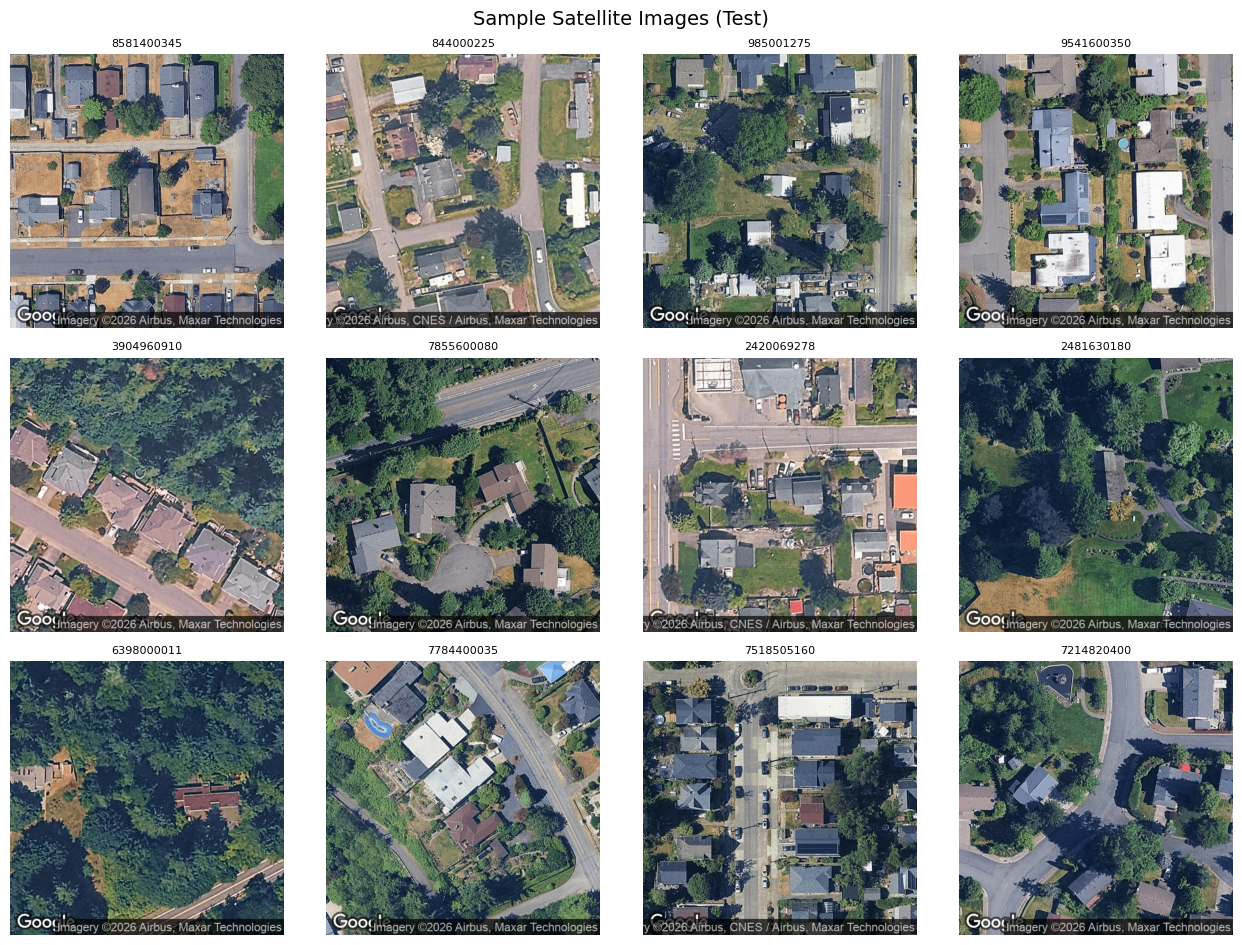

In [5]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import random

TRAIN_IMG_DIR = Path("data/images/train")
TEST_IMG_DIR = Path("data/images/test")

def sample_image_paths(img_dir, n=12):
    paths = list(img_dir.glob("*.png")) + list(img_dir.glob("*.jpg")) + list(img_dir.glob("*.jpeg"))
    if len(paths) == 0:
        raise FileNotFoundError(f"No images found in {img_dir}")
    random.shuffle(paths)
    return paths[:min(n, len(paths))]

def plot_image_grid(paths, title, out_path, cols=4):
    rows = int(np.ceil(len(paths)/cols))
    plt.figure(figsize=(cols*3.2, rows*3.2))
    for i, p in enumerate(paths, start=1):
        plt.subplot(rows, cols, i)
        try:
            img = Image.open(p).convert("RGB")
        except Exception:
            img = Image.new("RGB", (256, 256))
        plt.imshow(img)
        plt.axis("off")
        plt.title(p.stem, fontsize=8)
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.savefig(out_path, dpi=200)
    plt.show()

# Train sample grid
train_paths = sample_image_paths(TRAIN_IMG_DIR, n=12)
plot_image_grid(train_paths,
                "Sample Satellite Images (Train)",
                "outputs/report_figures/fig5_train_satellite_samples.png")

# Test sample grid (optional)
test_paths = sample_image_paths(TEST_IMG_DIR, n=12)
plot_image_grid(test_paths,
                "Sample Satellite Images (Test)",
                "outputs/report_figures/fig6_test_satellite_samples.png")


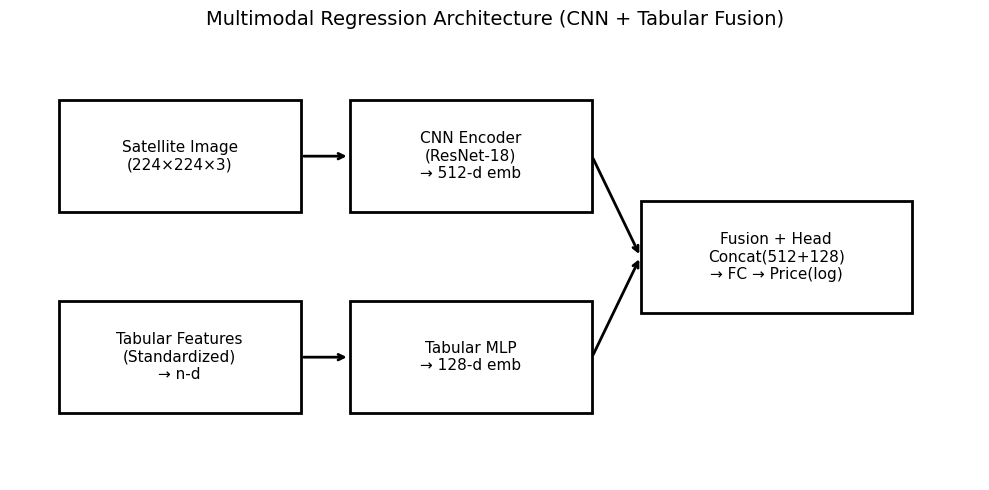

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.axis("off")

# Boxes
boxes = {
    "sat": (0.05, 0.60, 0.25, 0.25, "Satellite Image\n(224×224×3)"),
    "cnn": (0.35, 0.60, 0.25, 0.25, "CNN Encoder\n(ResNet-18)\n→ 512-d emb"),
    "tab": (0.05, 0.15, 0.25, 0.25, "Tabular Features\n(Standardized)\n→ n-d"),
    "mlp": (0.35, 0.15, 0.25, 0.25, "Tabular MLP\n→ 128-d emb"),
    "fusion": (0.65, 0.375, 0.28, 0.25, "Fusion + Head\nConcat(512+128)\n→ FC → Price(log)"),
}

for key, (x, y, w, h, text) in boxes.items():
    rect = plt.Rectangle((x, y), w, h, fill=False, linewidth=2)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, text, ha="center", va="center", fontsize=11)

# Arrows
def arrow(x1, y1, x2, y2):
    ax.annotate("", xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle="->", linewidth=2))

arrow(0.30, 0.725, 0.35, 0.725)     # sat -> cnn
arrow(0.60, 0.725, 0.65, 0.50)      # cnn -> fusion
arrow(0.30, 0.275, 0.35, 0.275)     # tab -> mlp
arrow(0.60, 0.275, 0.65, 0.50)      # mlp -> fusion

plt.title("Multimodal Regression Architecture (CNN + Tabular Fusion)", fontsize=14)
plt.tight_layout()
plt.savefig("outputs/report_figures/fig7_architecture_diagram.png", dpi=250)
plt.show()


In [7]:
from pathlib import Path

figs = sorted(Path("outputs/report_figures").glob("*.png"))
for f in figs:
    print(f.name)
print("Total figures:", len(figs))


fig1_price_hist.png
fig2_log_price_hist.png
fig3_geo_scatter.png
fig4_corr_heatmap.png
fig5_train_satellite_samples.png
fig6_test_satellite_samples.png
fig7_architecture_diagram.png
Total figures: 7
